In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
plt.rcParams['figure.figsize'] = (15, 10)

In [13]:
housing = pd.read_csv('./data/housing.csv')
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [23]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

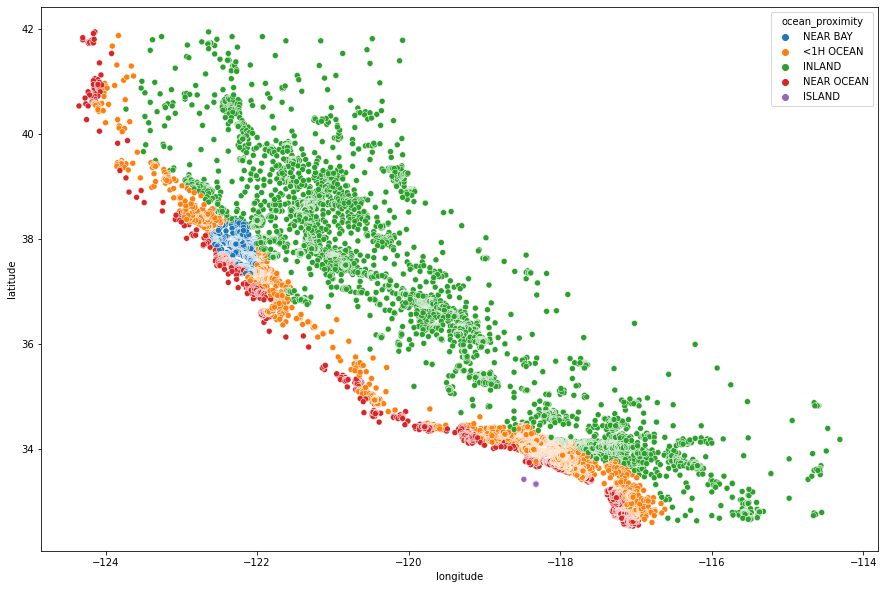

In [5]:
sns.scatterplot(data=housing, x='longitude', y='latitude', hue='ocean_proximity')

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

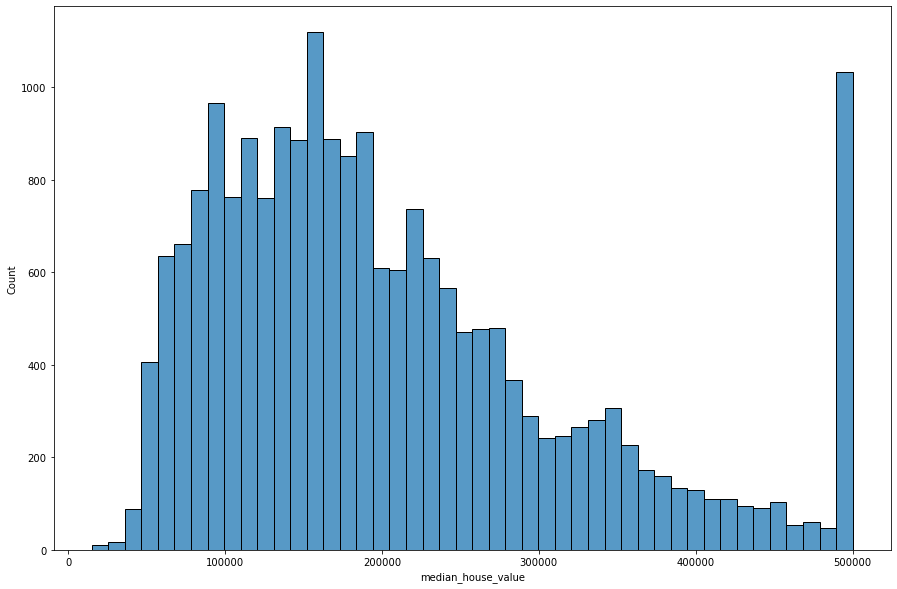

In [6]:
sns.histplot(housing['median_house_value'])

In [7]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## Missing values

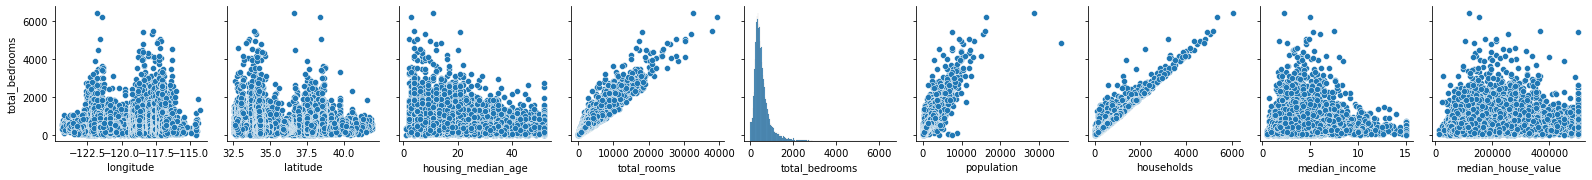

In [18]:
sns.pairplot(housing, y_vars="total_bedrooms")

In [20]:
housing.corr()['total_bedrooms']

longitude             0.069608
latitude             -0.066983
housing_median_age   -0.320451
total_rooms           0.930380
total_bedrooms        1.000000
population            0.877747
households            0.979728
median_income        -0.007723
median_house_value    0.049686
Name: total_bedrooms, dtype: float64

<AxesSubplot:>

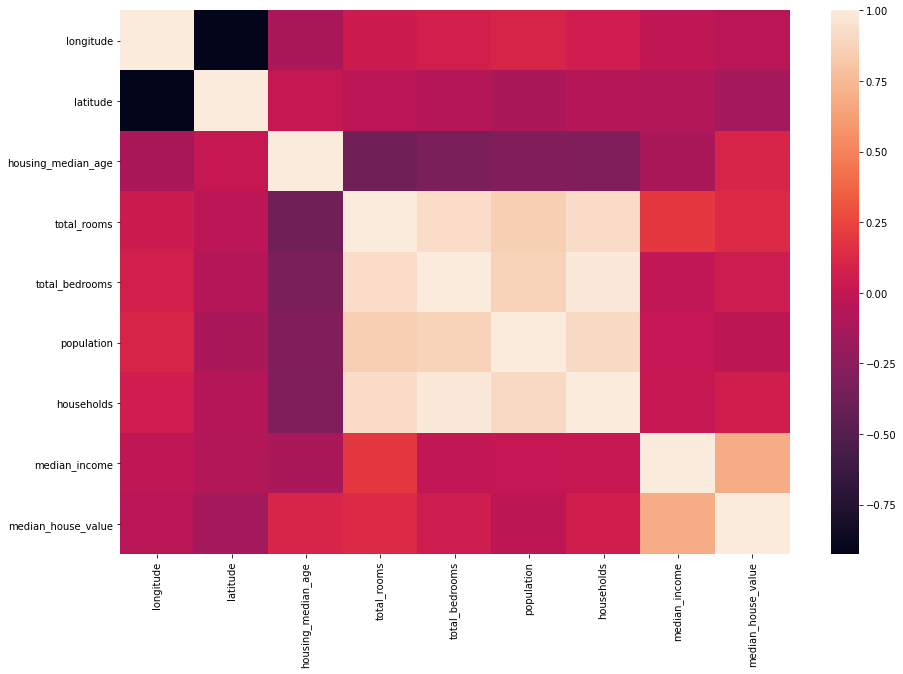

In [21]:
sns.heatmap(housing.corr())

In [22]:
housing['total_bedrooms'].fillna(value=housing['total_bedrooms'].median(),inplace=True)

## One Hot Encoding

In [28]:
ocean_proximity = pd.get_dummies(housing['ocean_proximity'], drop_first=True)
ocean_proximity.head()

INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0       0       0         1           0
1       0       0         1           0
2       0       0         1           0
3       0       0         1           0
4       0       0         1           0

In [29]:
housing = pd.concat([housing, ocean_proximity], axis=1)
housing.drop('ocean_proximity', axis=1, inplace=True)
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  INLAND  \
0           322.0       126.0         8.3252            452600.0       0   
1          2401.0      1138.0         8.3014            358500.0       0   
2           496.0       177.0         7.2574            352100.0       0   
3           558.0       219.0         5.6431            341300.0       0   
4           565.0       259.0         3.8462            342200.0       0   
...           ...         ...            ...                 ...     ...   
20635       845.0       330.0         1.5603             78100.0       1   
20636       356.0       114.0         2.5568             77100.0       1   
20637      1007.0       433.0         1.7000             92300.0       1   
20638       741.0       349.0         1.8672             84700.0       1   
20639      1387.0       530.0         2.3886             89400.0       1   

       ISLAND  NEAR BAY  NEAR OCEAN  
0           0         1           0  
1           0         1           0  
2           0         1           0  
3           0         1           0  
4           0         1           0  
...       ...       ...         ...  
20635       0         0           0  
20636       0         0           0  
20637       0         0           0  
20638       0         0           0  
20639       0         0           0  

[20640 rows x 13 columns]

## Training

In [30]:
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6254240620553619